In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
seed = 2022

In [2]:
csv_file = "../data/cleaned_EThOS_CSV_202304.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

/var/folders/l7/bnn1j6bs3bqfskq2jlq55yh80000gr/T/ipykernel_31523/3713674850.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="ISO-8859-2")


,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,


In [3]:
df[(df["Date"]==2016) &
   (df["Institution"]=="University of Oxford") &
   (df["Subject Discipline"]=='Physical Sciences') &
   (df["Author"].str.contains("Roberts"))]["Abstract"].iloc[0]

'The Compact Linear Collider (CLIC) is a proposal for a future linear electron--positron collider that could achieve collision energies of up to 3 TeV. In the CLIC concept the main high energy beam is accelerated using RF power extracted from a high intensity drive beam, achieving an accelerating gradient of 100 MV/m. This scheme places strict tolerances on the drive beam phase stability, which must be better than 0.2 degrees at 12 GHz. To achieve the required phase stability CLIC proposes a high bandwidth (&GT;17.5 MHz), low latency drive beam ~phase feedforward~ (PFF) system. In this system electromagnetic kickers, powered by 500 kW amplifiers, are installed in a chicane and used to correct the phase by deflecting the beam on to longer or shorter trajectories. A prototype PFF system has been installed at the CLIC Test Facility, CTF3; the design, operation and commissioning of which is the focus of this work. Two kickers have been installed in the pre-existing chicane in the TL2 trans

In [4]:
set(df["Subject Discipline"])

{' ',
 'Agriculture & Veterinary Sciences',
 'Architecture, Building & Planning',
 'Biological Sciences',
 'Business & Administrative Studies',
 'Computer Science',
 'Creative Arts & Design',
 'Education',
 'Engineering & Technology',
 'History & Archaeology',
 'Language & Literature',
 'Law',
 'Librarianship & Information Science',
 'Mathematics & Statistics',
 'Medicine & Health',
 'Music',
 'Philosophy, Psychology & Religious Studies',
 'Physical Sciences',
 'Social, Economic & Political Studies',
 'Sport & Recreation'}

In [5]:
df["Decade"] = [int(f"{str(year)[:3]}0") for year in df["Date"]]

In [6]:
# taken from Desert Island Discs notebook
def make_timeplot(
    df, ymin=0, horiz_line_y=0, leg_title="", y_title=""
):
    c = sns.color_palette("Paired", max(4, len(df.columns)))

    plt.figure(figsize=(10, 3), dpi=100)
    plt.gca().set_facecolor(c[0])
    xs = df.index

    for i, col in enumerate(reversed(df.columns)):
        plt.fill_between(
            xs, df[col], interpolate=False, color=c[i], label=col, alpha=1.0
        )

    if horiz_line_y > 0:
        plt.plot(
            plt.xlim(),
            [horiz_line_y, horiz_line_y],
            color="black",
            ls=((0, (10, 5))),
            lw=1.5,
        )

    plt.xlabel("Year", fontsize=10, fontweight="bold")
    plt.ylabel(y_title, fontsize=10, fontweight="bold")

    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)

    plt.xlim(df.index[0], df.index[-1])
    plt.ylim(ymin, 1)
    leg = plt.legend(
        loc="upper left",
        bbox_to_anchor=(1.01, 1.01),
        fontsize=10,
        facecolor="white",
        frameon=True,
        framealpha=1,
        edgecolor="white",
    )
    leg.set_title(
        leg_title, prop={"size": 10, "weight": "bold", "family": "sans-serif"}
    )
    leg._legend_box.align = "left"

    plt.show()
    
def normalize_rows(df):
    df = df.div(df.sum(axis=1), axis=0)
    df = df.fillna(0)

    return df

def cumulative_columns(df):
    """
    Loop through columns and calculate running totals
    per row.
    """

    # for each column (except the first)
    for i, col in enumerate(df):
        if i == 0:
            continue

        # add the previous column to this column
        df[col] += df[df.columns[i - 1]]

    return df

In [7]:
sub_and_date_df = df[(df["Subject Discipline"]!=" ") & (df["Date"]!=" ")]
subjects = sorted(list(set(sub_and_date_df["Subject Discipline"])))
date_df = pd.pivot_table(sub_and_date_df, 
                         columns="Subject Discipline",
                         index="Decade",
                         values="Date",
                         aggfunc="count")
date_df = normalize_rows(date_df)
date_df = date_df[subjects]
date_df = cumulative_columns(date_df)
date_df

Subject Discipline,Agriculture & Veterinary Sciences,"Architecture, Building & Planning",Biological Sciences,Business & Administrative Studies,Computer Science,Creative Arts & Design,Education,Engineering & Technology,History & Archaeology,Language & Literature,Law,Librarianship & Information Science,Mathematics & Statistics,Medicine & Health,Music,"Philosophy, Psychology & Religious Studies",Physical Sciences,"Social, Economic & Political Studies",Sport & Recreation
Decade,,,,,,,,,,,,,,,,,,,
1760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
1790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.857143,0.857143,1.000000,1.000000,1.0
1830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.933333,0.933333,0.933333,1.000000,1.000000,1.0


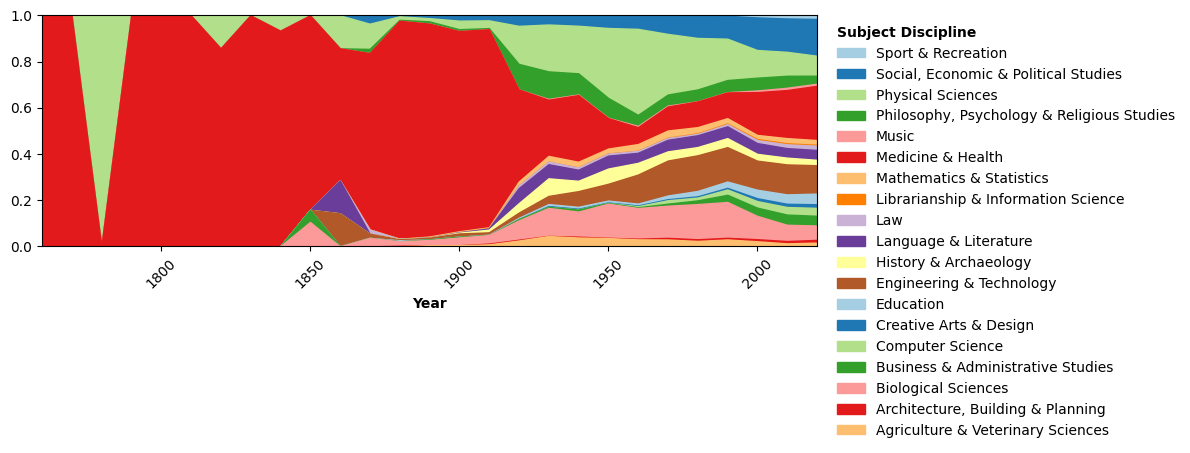

In [8]:
make_timeplot(date_df, leg_title="Subject Discipline")

looking at it on a date level rather than decade level

In [9]:
sub_and_date_df = df[(df["Subject Discipline"]!=" ") & (df["Date"]!=" ")]
sub_and_date_df["Date"] = pd.to_numeric(sub_and_date_df["Date"])
subjects = sorted(list(set(sub_and_date_df["Subject Discipline"])))
date_df = pd.pivot_table(sub_and_date_df, 
                         columns="Subject Discipline",
                         index="Date",
                         values="Title",
                         aggfunc=len)
date_df = normalize_rows(date_df)
date_df = date_df[subjects]
date_df = cumulative_columns(date_df)
date_df

/var/folders/l7/bnn1j6bs3bqfskq2jlq55yh80000gr/T/ipykernel_31523/467010850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_and_date_df["Date"] = pd.to_numeric(sub_and_date_df["Date"])


Subject Discipline,Agriculture & Veterinary Sciences,"Architecture, Building & Planning",Biological Sciences,Business & Administrative Studies,Computer Science,Creative Arts & Design,Education,Engineering & Technology,History & Archaeology,Language & Literature,Law,Librarianship & Information Science,Mathematics & Statistics,Medicine & Health,Music,"Philosophy, Psychology & Religious Studies",Physical Sciences,"Social, Economic & Political Studies",Sport & Recreation
Date,,,,,,,,,,,,,,,,,,,
1768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
1798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.012743,0.023123,0.087118,0.131696,0.165107,0.179379,0.220853,0.355514,0.381881,0.422335,0.438971,0.443373,0.465060,0.679194,0.689018,0.737210,0.841196,0.986515,1.0
2020,0.014935,0.026870,0.087012,0.128884,0.163889,0.179157,0.226030,0.348847,0.372783,0.413722,0.432324,0.436058,0.457594,0.693826,0.703427,0.737232,0.825843,0.984665,1.0
2021,0.023684,0.036466,0.108271,0.149624,0.183083,0.199624,0.244737,0.362782,0.384962,0.436090,0.454135,0.459398,0.475940,0.696241,0.702256,0.742857,0.822932,0.981203,1.0


In [10]:
def moving_average(df, n=3):
    df = df.rolling(window=n).mean()  # moving average
    df = df.dropna(how="all")  # drop lost columns

    return df

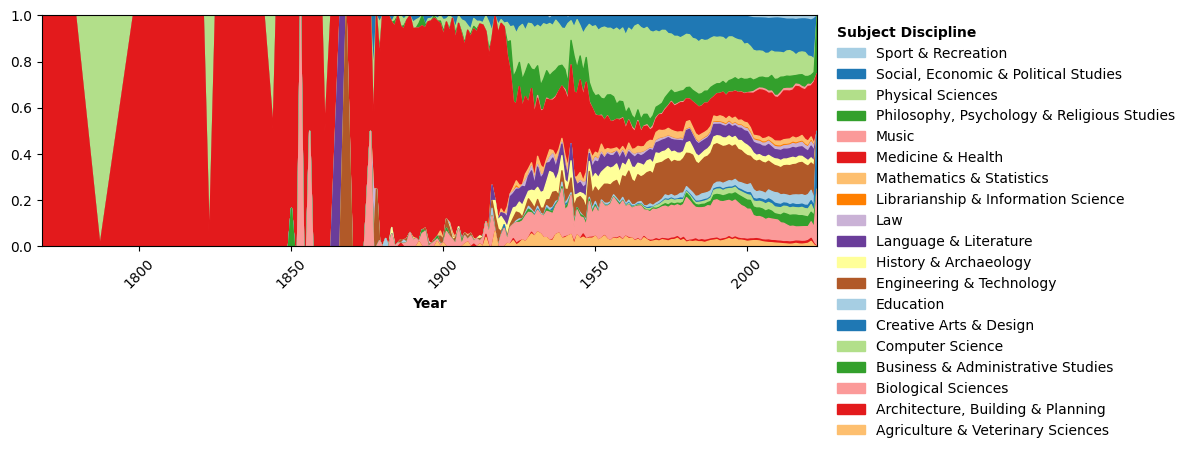

In [11]:
make_timeplot(moving_average(date_df, 1), leg_title="Subject Discipline")

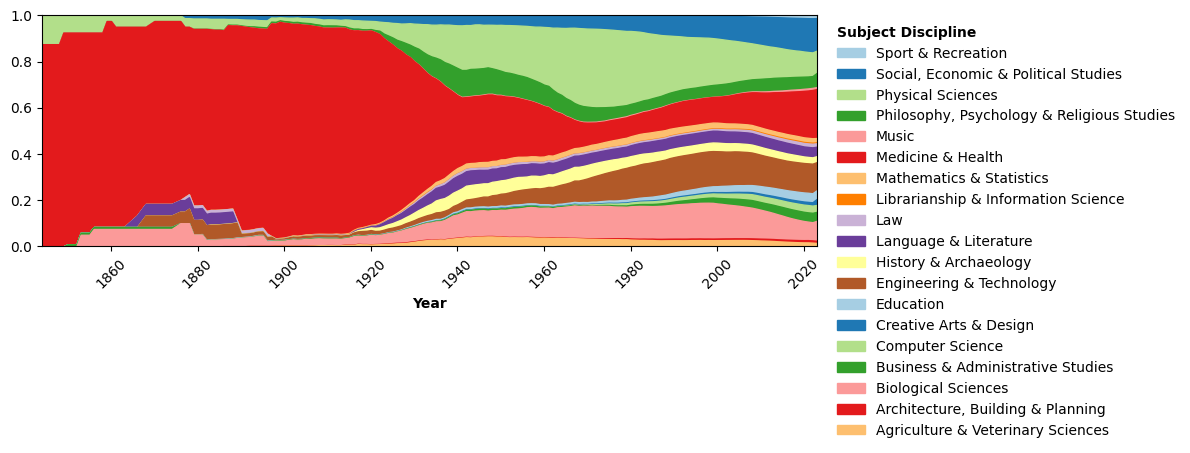

In [12]:
make_timeplot(moving_average(date_df, 20), leg_title="Subject Discipline")

## Instutitutions over time

In [13]:
inst_and_date_df = df[(df["Institution"]!=" ") & (df["Date"]!=" ")]
institutes = sorted(list(set(inst_and_date_df["Institution"])))
date_df = pd.pivot_table(inst_and_date_df, 
                         columns="Institution",
                         index="Decade",
                         values="Date",
                         aggfunc="count")
date_df = normalize_rows(date_df)
date_df = date_df[institutes]
date_df = cumulative_columns(date_df)
date_df

Institution,Abertay University,Aberystwyth University,Anglia Ruskin University,Arts University Bournemouth,Aston University,Bangor University,Bath Spa University,Birkbeck (University of London),Birmingham City University,Bournemouth University,...,University of Wolverhampton,University of Worcester,University of York,University of the Arts London,University of the Highlands and Islands,"University of the West of England, Bristol",University of the West of Scotland,Warburg Institute,Wessex Institute of Technology,York St John University
Decade,,,,,,,,,,,,,,,,,,,,,
1760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


too many universities for this kind of plot really

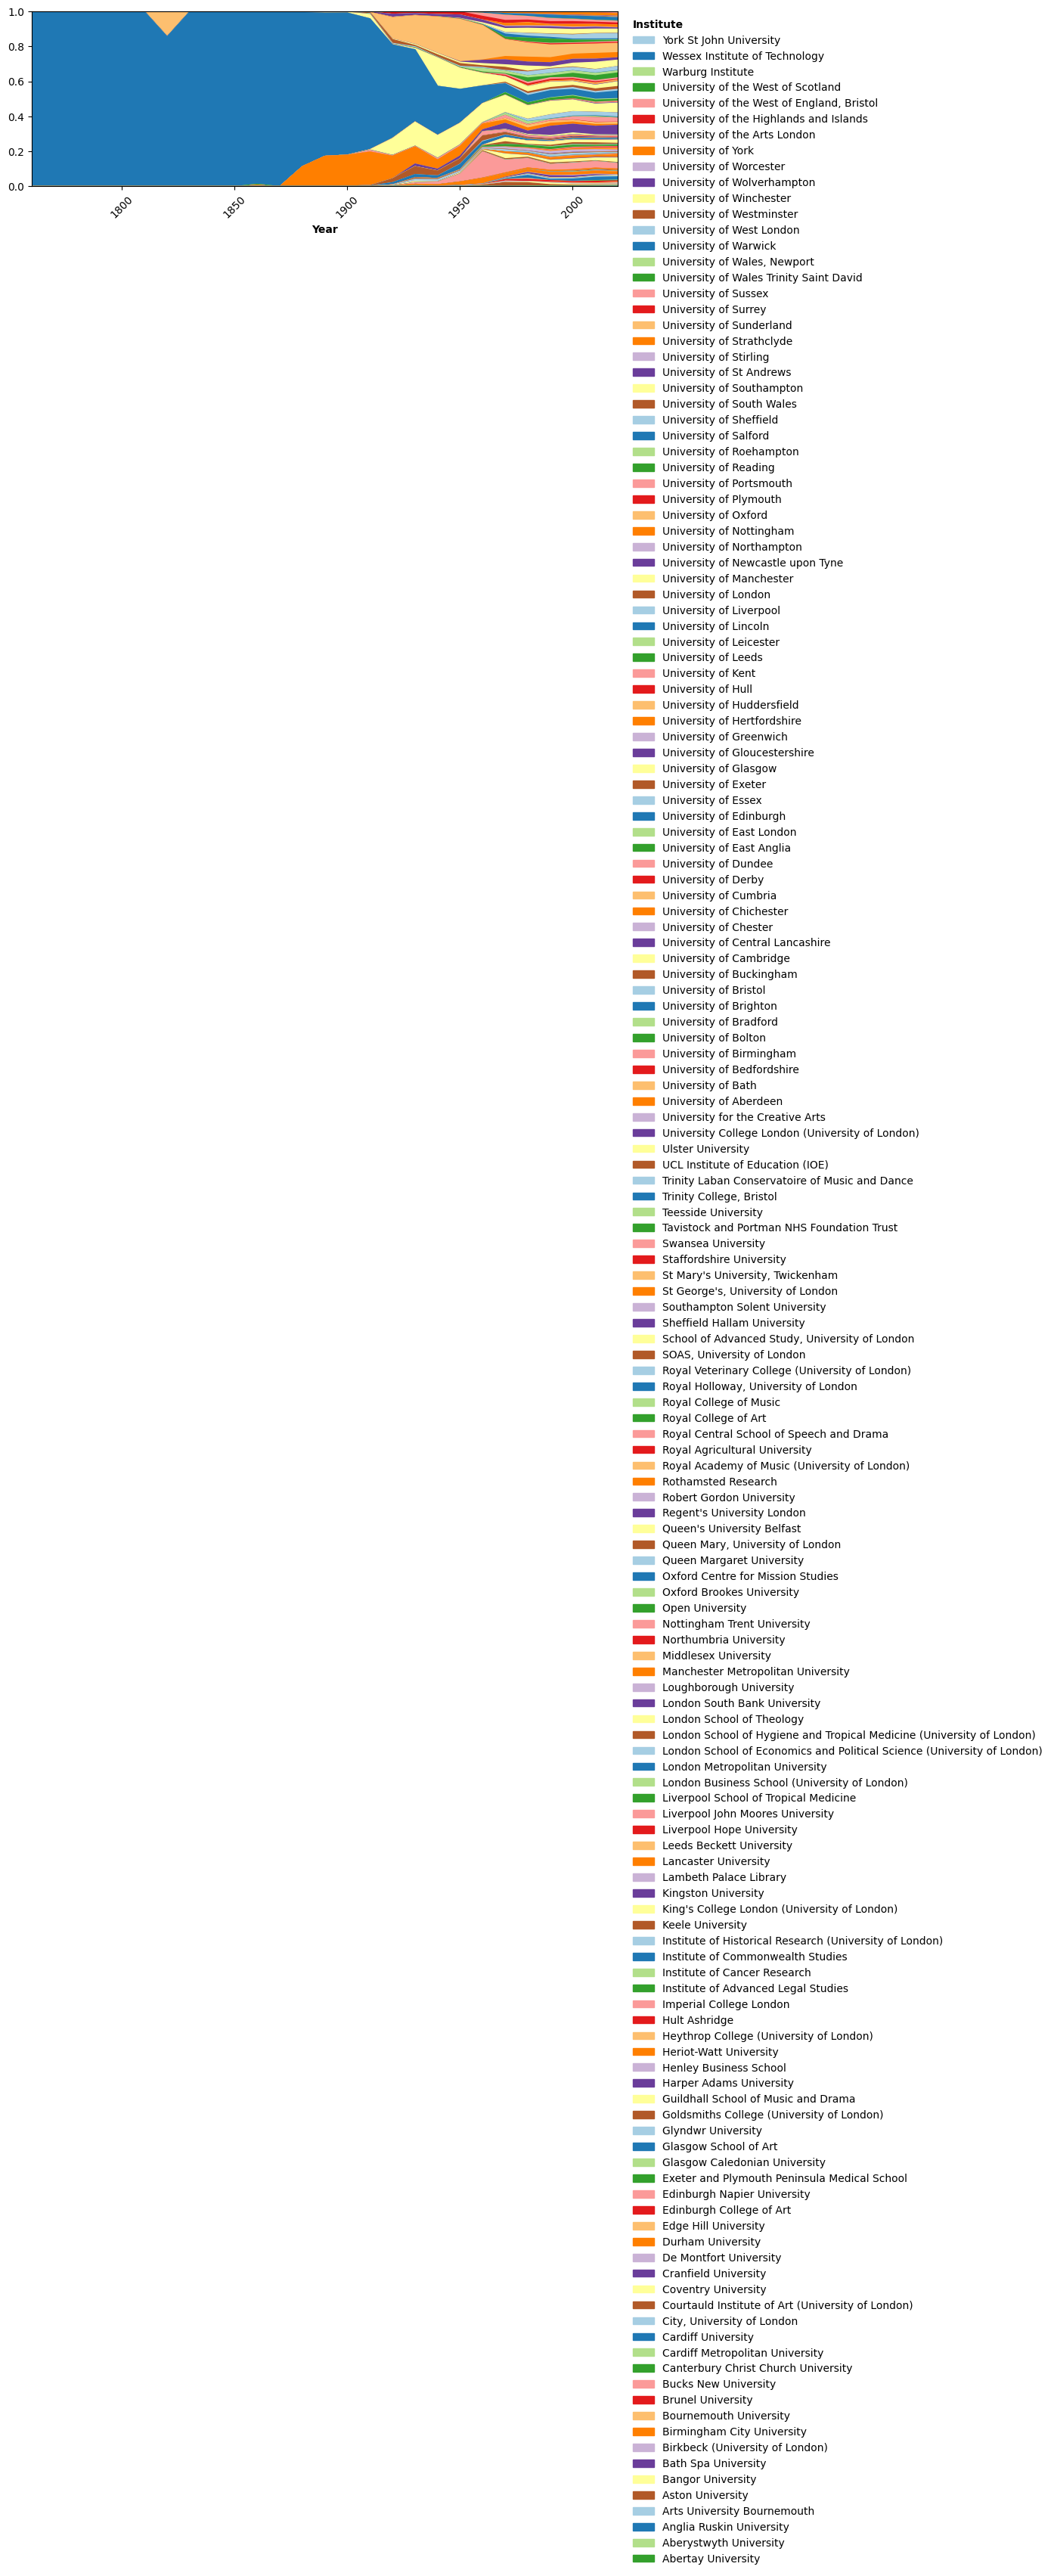

In [14]:
make_timeplot(date_df, leg_title="Institute")

In [15]:
inst_and_date_df[inst_and_date_df["Decade"]==1790]

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Decade
400128,400128,"Dissertatio medica inauguralis, de epispastici...",,"Irvine, William",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1798,Thesis (M.D.),In lucem publicam rudes juvenis edere investig...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10439,1790


In [16]:
inst_and_date_df[inst_and_date_df["Decade"]==1800]

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Decade
396336,396336,Tentamen medicum inaugurale de febre intermitt...,,"Halpin, Oliver",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1802,Thesis (M.D.),Cullenus eximius omnes febres dividit in inter...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10333,1800
396337,396337,Disputatio medica inauguralis de febre remitte...,,"Lindesay, John",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1805,Thesis (M.D.),"Febres Indiae Occidentalis, pariter atque eae ...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10334,1800
396338,396338,"Dissertatio medica inauguralis, de febre flava...",,"Carr, Charles",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1808,Thesis (M.D.),"Febres, quae in regionibus calidis homines inv...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10335,1800
396339,396339,Dissertatio medica inauguralis de febre interm...,,"Forbes, Charles Fergusson",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1808,Thesis (M.D.),"Febrem intermittentem, de qua disserere statui...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10336,1800


In [17]:
inst_and_date_df[inst_and_date_df["Decade"]==1810]

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Decade
312210,312210,"Disputatio Medica Inaugralis, de Merocele, vel...",,"Barry, James",https://isni.org/isni/0000000427277245,,University of Edinburgh,https://isni.org/isni/0000000419367988,1812,Thesis (M.D.),"Few diseases are more important than Hernia, w...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/417,1810
396340,396340,"Dissertatio medica inauguralis, de febri endem...",,"Shortt, Thomas",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1815,Thesis (M.D.),Quamdiu homies manserunt proprio solo adstrict...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10337,1810
396341,396341,"Dissertatio medica inauguralis, de febre flava...",,"Shortt, John",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1817,Thesis (M.D.),Omissis omnibus disputationibus de nomine quod...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10401,1810
583802,583802,"Disputatio physiologica inaugurahs, de caeli e...",https://doi.org/10.7488/era/1024,"Pitta, Nicolaus C.",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1812,Thesis (M.D.),Caelum in genus humanum varias magnasque mutat...,,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,https://doi.org/10.7488/era/1024,1810
587331,587331,De ictero,https://doi.org/10.7488/era/1265,"Moniz, LourencÄÂ§o JoseÄÂ",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1815,Thesis (M.D.),,Medicine & Health,"Baird, George Husband",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,https://doi.org/10.7488/era/1265,1810


In [18]:
inst_and_date_df[inst_and_date_df["Decade"]==1820]

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Decade
396342,396342,"Disputatio medica inauguralis, de febre Gibral...",,"King, Henry",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1820,Thesis (M.D.),Regulis hujus academiae celeberrimae postulant...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10410,1820
396343,396343,Dissertatio medica inauguralis de amenorrhoea,,"Blest, Guillermo Cunningham",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1821,Thesis (M.D.),Cui melius consacrem primitias meorum in Medic...,Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10329,1820
396344,396344,"Dissertatio medica inauguralis, de febre flava...",,"McGee, William",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1828,Thesis (M.D.),"Quandoquidem morbi cujusvis scientia, pro peri...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10411,1820
396345,396345,Dissertatio medica inauguralis de febri endemi...,,"Thomson, John",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1828,Thesis (M.D.),"Qualis extiterit Febris inter naves, dum Batav...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10412,1820
400127,400127,Dissertatio medica inauguralis de scrofula : q...,,"Hennis, Peter",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1825,Thesis (M.D.),"Omnium studiorum quibus mens humana occupatur,...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10438,1820
406004,406004,"Disputatio medica inauguralis, quaedam de apop...",,"Annan, Samuel",,,University of Edinburgh,https://isni.org/isni/0000000419367988,1820,Thesis (M.D.),"Legibus almae hujus Academiae, quae, omnes eos...",Medicine & Health,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://hdl.handle.net/1842/10464,1820
423546,423546,A synthesis of substitution derivatives of indigo,,"Overmyer, Calvin J.",,,University of Oxford,https://isni.org/isni/0000000419368948,1823,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,1820


## Named-entity recognition

In [19]:
import spacy
import pickle
nlp = spacy.load('en_core_web_md')

df_2 = df[df["Abstract"]!= " "]
abstract_docs = list(nlp.pipe(df_2["Abstract"], n_process=2))

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.